In [1]:
"""
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = '../data/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)]) # (42, 2)
n_samples = sheet.nrows - 1 # 42

In [2]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, shape=[], name='input_X')
Y = tf.placeholder(tf.float32, shape=[], name='input_Y')

# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(initial_value=tf.zeros([1]), dtype=tf.float32, name='weights')
b = tf.Variable(initial_value=tf.zeros([1]), dtype=tf.float32, name='bias')

# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = X * w + b

# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y_predicted - Y, name='loss')

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    # TO - DO
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./tensorboard_graph/03/linear_reg', sess.graph)
    
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss
            # TO DO: write sess.run()
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    
    # close the writer when you're done using it
    writer.close()
    
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

Epoch 0: [ 2069.63232422]
Epoch 1: [ 2117.01220703]
Epoch 2: [ 2092.30273438]
Epoch 3: [ 2068.50805664]
Epoch 4: [ 2045.59155273]
Epoch 5: [ 2023.51452637]
Epoch 6: [ 2002.24475098]
Epoch 7: [ 1981.74829102]
Epoch 8: [ 1961.99438477]
Epoch 9: [ 1942.95202637]
Epoch 10: [ 1924.59313965]
Epoch 11: [ 1906.88989258]
Epoch 12: [ 1889.81616211]
Epoch 13: [ 1873.3470459]
Epoch 14: [ 1857.4588623]
Epoch 15: [ 1842.12854004]
Epoch 16: [ 1827.33239746]
Epoch 17: [ 1813.05249023]
Epoch 18: [ 1799.26623535]
Epoch 19: [ 1785.95629883]
Epoch 20: [ 1773.10229492]
Epoch 21: [ 1760.68920898]
Epoch 22: [ 1748.6986084]
Epoch 23: [ 1737.11364746]
Epoch 24: [ 1725.92077637]
Epoch 25: [ 1715.10437012]
Epoch 26: [ 1704.65014648]
Epoch 27: [ 1694.54467773]
Epoch 28: [ 1684.77478027]
Epoch 29: [ 1675.32910156]
Epoch 30: [ 1666.19348145]
Epoch 31: [ 1657.35864258]
Epoch 32: [ 1648.8125]
Epoch 33: [ 1640.54431152]
Epoch 34: [ 1632.5447998]
Epoch 35: [ 1624.80407715]
Epoch 36: [ 1617.31286621]
Epoch 37: [ 1610.06

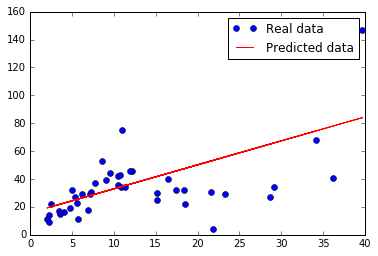

In [3]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()